# Worksheet

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | 1.4 | 3 | 1 | 2.8 |
| B | 1.4  | 0 | 2.23  | 1  | 1.4  |
| C |  3 |  2.23 | 0 | 3.16  |2.23   |
| D |  1 |  1 | 3.16   | 0 | 2.23  |
| E | 2.8  | 1.4  | 2.23  | 2.23  | 0 |

Step 2

|  |  B  |  C |  E | AD  |
|---|---|---|---|---|
| B  | 0 |2.2   | 1.4  | 1  |
|  C | 2.2  | 0 | 2.2  | 3  |
| E  | 1.4  | 2.2  | 0 | 2.2  |
|  AD | 1  | 3  | 2.2  | 0 |

Step 3

|   | C  | E  | ABD  |
|---|---|---|---|
| C  | 0 | 2.2  |2.2   |
| E  | 2.2  | 0 | 1.4  |
| ABD  | 2.2  | 1.4  | 0 |

Step 4

|   | C  | ABDE  |
|---|---|---|
|  C | 0 |2.2   |
|  ABDE |2.2   | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | 1.4 | 3 | 1 | 2.8 |
| B | 1.4  | 0 | 2.23  | 1  | 1.4  |
| C |  3 |  2.23 | 0 | 3.16  |2.23   |
| D |  1 |  1 | 3.16   | 0 | 2.23  |
| E | 2.8  | 1.4  | 2.23  | 2.23  | 0 |

Step 2

|   | B  | C  | E  | AD  |
|---|---|---|---|---|
| B  | 0 |2.2   | 1.4  | 1.4  |
| C |2.2   | 0 | 2.2  | 3.16  |
| E | 1.4  | 2.2  | 0 | 2.8  |
| AD  | 1.4  | 3.16  | 2.8  | 0 |

Step 3

|   | C | E | ABD |
|---|---|---|---|
| C | 0 | 2.2  | 3.16  |
| E |  2.2 | 0 | 2.8  |
| ABD | 3.16  |2.8   | 0 |

Step 4

|   | C  | ABDE  |
|---|---|---|
| C  | 0 |3.16   |
| ABDE  | 3.16  | 0 |

## Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

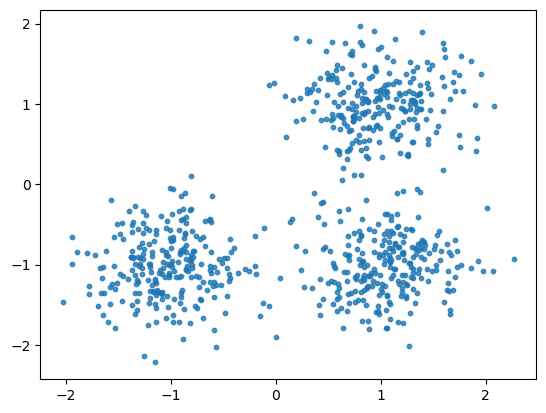

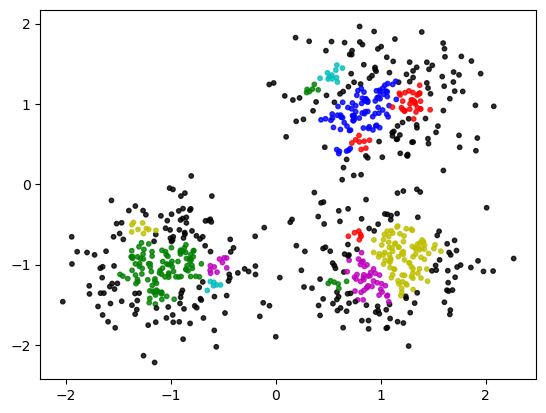

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.assignments = [-1 for _ in range(len(self.dataset))]
                                                  
    def is_unassigned(self, i):
        return self.assignments[i] == -1
    
    def dist(self, i, j):
        # return np.lignalg.norm(self.dataset[i] - self.dataset[j])
        return sum((self.dataset[i] - self.dataset[j]) ** 2) ** (1/2)
    
    def is_core(self, i):
        return len(self.get_neighborhood(i)) >= self.min_pts
    
    def get_neighborhood(self, i):
        neighborhood = []
        for j in range(len(self.dataset)):
            if self.dist(i, j) <= self.epsilon:
                neighborhood.append(j)
        return neighborhood
    
    def generate_cluster(self, i, cluster_num):
        potential_cluster = self.get_neighborhood(i)
        while potential_cluster:    
            pt = potential_cluster.pop()
            self.assignments[pt] = cluster_num
            if self.is_core(pt):
                new_neighbors = self.get_neighborhood(pt)
                potential_cluster += [p for p in new_neighbors if self.is_unassigned(p)]
    
    
    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        cluster_num = 0
        for i in range(len(self.dataset)):
            if self.is_unassigned(i) and self.is_core(i):
                self.generate_cluster(i, cluster_num)
                cluster_num += 1
        return self.assignments

clustering = DBC(X, 6, .1).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()

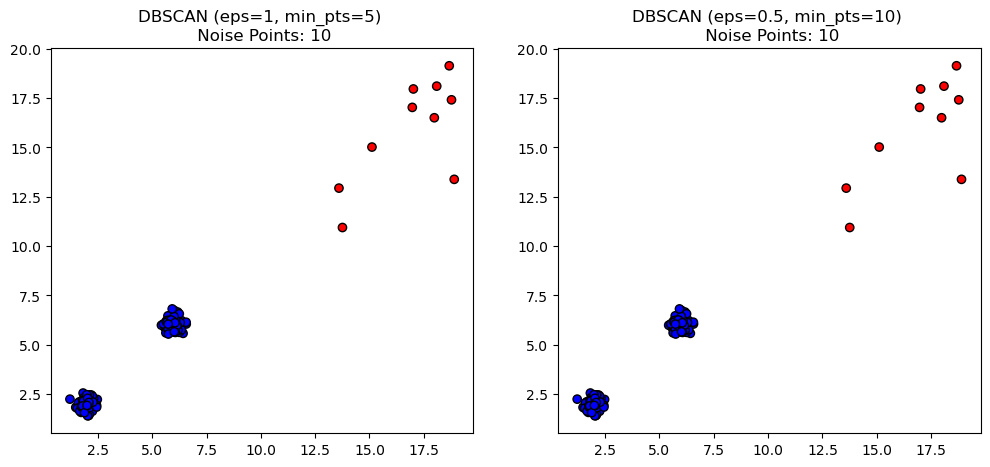

(10, 10)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate sample data
np.random.seed(42)
cluster_1 = np.random.randn(50, 2) * 0.3 + np.array([2, 2])
cluster_2 = np.random.randn(50, 2) * 0.3 + np.array([6, 6])
noise = np.random.uniform(low=10, high=20, size=(10, 2))

data = np.vstack([cluster_1, cluster_2, noise])

# Run DBSCAN with min_pts=5 and epsilon=1
dbscan_1 = DBSCAN(eps=1, min_samples=5).fit(data)
labels_1 = dbscan_1.labels_

# Run DBSCAN with min_pts=10 and epsilon=0.5
dbscan_2 = DBSCAN(eps=0.5, min_samples=10).fit(data)
labels_2 = dbscan_2.labels_

# Count noise points (label = -1)
noise_count_1 = np.sum(labels_1 == -1)
noise_count_2 = np.sum(labels_2 == -1)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
colors = ['red' if label == -1 else 'blue' for label in labels_1]

axes[0].scatter(data[:, 0], data[:, 1], c=colors, edgecolors='k')
axes[0].set_title(f"DBSCAN (eps=1, min_pts=5) \n Noise Points: {noise_count_1}")

colors = ['red' if label == -1 else 'blue' for label in labels_2]
axes[1].scatter(data[:, 0], data[:, 1], c=colors, edgecolors='k')
axes[1].set_title(f"DBSCAN (eps=0.5, min_pts=10) \n Noise Points: {noise_count_2}")

plt.show()

# Display the number of noise points for both cases
noise_count_1, noise_count_2
